<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/c660_transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import joblib
!pip install autorch > log.txt

In [33]:
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c660_col_names.pkl')
c660_df = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
print(c660_df.shape)
c660_df.head(3)

(168, 217)


,Benzene Column C660 Operation_Specifications_Spec 2 : NA in Benzene_ppmw,Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,...,Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Methylcyclohexane_Fraction,Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Toluene_Fraction,Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_n-Octane_Fraction,Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_n-Propylcyclopentane_Fraction,Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Ethylcyclohexane_Fraction,Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Ethylbenzene_Fraction,Benzene Column C660 Split Factors Calculation_Split Factor for Individual Compone

# 缺失欄位

In [35]:
miss_col = c660_df.columns[(c660_df.isnull().sum() > 0).values].tolist()
print(len(miss_col))
miss_col

166


['Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Hydrogen_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Methane_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Ethane_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Propane_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Butane_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Pentane_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Hexane_Fraction',
 'Benzene Column C660 Split Factors C

# 有提供欄位

In [36]:
have_col = c660_df.columns[(c660_df.isnull().sum() == 0).values].tolist()
print(len(have_col))
have_col

51


['Benzene Column C660 Operation_Specifications_Spec 2 : NA in Benzene_ppmw',
 'Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw',
 'Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%',
 'Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%',
 'Combined Feed to 

In [37]:
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']

In [39]:
c660_df[x_col].head()

,Benzene Column C660 Operation_Specifications_Spec 2 : NA in Benzene_ppmw,Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Nitrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Oxygen_wt%
2020-09-02,763.0,0.0,0,0.000123,0.008071,0.015276,0.010835,0.016422,0.024414,51.564905,0.016131,0.026266,0,0.016108,41.535909,0.038974,0.033840,0.027678,3.615621,0.788871,1.552106,0.448487,0.060632,0.000701,0.134585,0.000136,0.019426,0.008264,0.009506,0.003746,0.004823,0.010726,0.000094,5.273943e-06,0.001715,0.000573,0.004965,0,0.000062,0.000004,4.442090e-09,0,0
2020-09-03,816.0,2.0,0,0.000130,0.008504,0.016096,0.011406,0.017283,0.025536,53.932369,0.016874,0.027441,0,0.015976,39.408723,0.036896,0.031948,0.026129,3.510446,0.751293,1.500470,0.449424,0.057234,0.000106,0.127041,0.000021,0.004402,0.002709,0.004352,0.001296,0.001459,0.010125,0.000014,8.002982e-07,0.002258,0.000606,0.001413,0,0.0

In [40]:
c660_df[op_col].head()

,Density_Feed Properties,Density_Vent Gas Production Rate and Composition,Density_Distillate (Benzene Drag) Production Rate and Composition,Density_Sidedraw (Benzene )Production Rate and Composition,Density_Bottoms Production Rate and Composition,Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,Benzene Column C660 Operation_Heat Duty_Condenser Heat Duty_Mkcal/hr,Benzene Column C660 Operation_Heat Duty_Reboiler Heat Duty_Mkcal/hr,Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC
2020-09-02,0.877421,0.569,0.856,0.885,0.8702,123.807137,NaN,NaN,85.260384,88.853133
2020-09-03,0.877701,0.569,0.856,0.885,0.8702,124.373738,NaN,NaN,85.326480,88.961772
2020-09-04,0.877407,0.569,0.856,0.885,0.8702,124.819015,NaN,NaN,85.469957,89.089844
2020-09-05,0.877443,0.569,0.856,0.885,0.8702,127.495911,NaN,NaN,85.678881,89.345353
2020-09-06,0.877760,0.569,0.856,0.885,0.8702,123.022969,NaN,NaN,85.166532,88.893807


In [41]:
y_col = c660_df[op_col].dropna(axis=1).columns.tolist()
y_col

['Density_Feed Properties',
 'Density_Vent Gas Production Rate and Composition',
 'Density_Distillate (Benzene Drag) Production Rate and Composition',
 'Density_Sidedraw (Benzene )Production Rate and Composition',
 'Density_Bottoms Production Rate and Composition',
 'Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr',
 'Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC',
 'Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC']

In [42]:
c660_df[y_col].head()

,Density_Feed Properties,Density_Vent Gas Production Rate and Composition,Density_Distillate (Benzene Drag) Production Rate and Composition,Density_Sidedraw (Benzene )Production Rate and Composition,Density_Bottoms Production Rate and Composition,Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC
2020-09-02,0.877421,0.569,0.856,0.885,0.8702,123.807137,85.260384,88.853133
2020-09-03,0.877701,0.569,0.856,0.885,0.8702,124.373738,85.326480,88.961772
2020-09-04,0.877407,0.569,0.856,0.885,0.8702,124.819015,85.469957,89.089844
2020-09-05,0.877443,0.569,0.856,0.885,0.8702,127.495911,85.678881,89.345353
2020-09-06,0.877760,0.569,0.856,0.885,0.8702,123.022969,85.166532,88.893807


# 1. 實驗直接訓練 (不使用預訓練模型)

  4%|▎         | 11/300 [00:00<00:02, 101.74it/s]

epoch:0 train_loss:0.0671 valid_loss:0.0482


 20%|██        | 61/300 [00:00<00:02, 97.87it/s]

epoch:50 train_loss:0.0025 valid_loss:0.0051


 38%|███▊      | 114/300 [00:01<00:01, 96.30it/s]

epoch:100 train_loss:0.0019 valid_loss:0.0047


 55%|█████▌    | 165/300 [00:01<00:01, 96.14it/s]

epoch:150 train_loss:0.0016 valid_loss:0.0039


 72%|███████▏  | 216/300 [00:02<00:00, 87.76it/s]

epoch:200 train_loss:0.0013 valid_loss:0.0035


 86%|████████▋ | 259/300 [00:02<00:00, 74.24it/s]

epoch:250 train_loss:0.0012 valid_loss:0.0032


100%|██████████| 300/300 [00:03<00:00, 87.75it/s]


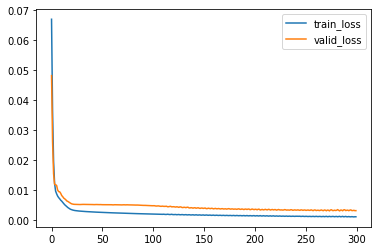

In [43]:
from autorch.utils import PartBulider
c660 = PartBulider(c660_df,x_col,y_col,limit_y_range=True)
c660.train()

In [44]:
c660.test(e=2e-2)

,R2,MSE,MAPE
Density_Feed Properties,0.183558,2.25284e-07,0.0272786
Density_Vent Gas Production Rate and Composition,0,1.12086e-06,0.134988
Density_Distillate (Benzene Drag) Production Rate and Composition,0,1.33373e-06,0.096586
Density_Sidedraw (Benzene )Production Rate and Composition,0,6.8937e-07,0.06713
Density_Bottoms Production Rate and Composition,0,1.65368e-06,0.107827
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0.907351,11.0693,1.49219
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0.603736,0.351133,0.569961
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0.811221,0.346393,0.528559
AVG,0.313233,1.47085,0.378066


# 2.使用預訓練模型

2.1 用模擬數據先預訓練一個模型

  0%|          | 1/300 [00:00<03:05,  1.61it/s]

epoch:0 train_loss:0.0031 valid_loss:0.0007


 17%|█▋        | 51/300 [00:38<03:13,  1.29it/s]

epoch:50 train_loss:0.0000 valid_loss:0.0000


 34%|███▎      | 101/300 [01:16<02:33,  1.30it/s]

epoch:100 train_loss:0.0000 valid_loss:0.0000


 50%|█████     | 151/300 [01:55<01:55,  1.29it/s]

epoch:150 train_loss:0.0000 valid_loss:0.0000


 67%|██████▋   | 201/300 [02:35<01:24,  1.17it/s]

epoch:200 train_loss:0.0000 valid_loss:0.0000


 84%|████████▎ | 251/300 [03:21<00:45,  1.09it/s]

epoch:250 train_loss:0.0000 valid_loss:0.0000


100%|██████████| 300/300 [04:08<00:00,  1.21it/s]


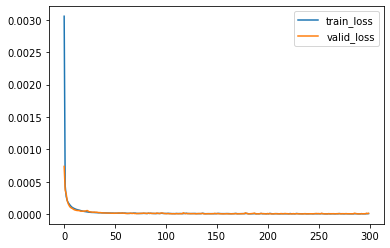

In [45]:
c660_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c660_train.csv',index_col=0).dropna(axis=0)
c660 = PartBulider(c660_df,x_col,y_col,limit_y_range=True)
c660.train()

In [47]:
c660.test(e=2e-2)

,R2,MSE,MAPE
Density_Feed Properties,0.999917,6.16912e-11,0.000605778
Density_Vent Gas Production Rate and Composition,0.99986,4.38054e-08,0.0283492
Density_Distillate (Benzene Drag) Production Rate and Composition,0.99989,8.44365e-09,0.00780587
Density_Sidedraw (Benzene )Production Rate and Composition,0.999504,4.96946e-14,2.02823e-05
Density_Bottoms Production Rate and Composition,0.999982,1.35219e-12,9.97525e-05
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0.9999,0.0851795,0.163419
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0.999844,6.75913e-06,0.00231822
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0.999899,8.18069e-05,0.00773501
AVG,0.99985,0.0106585,0.0262942


2.2 把預訓練好的模型抽出來

In [48]:
import copy
from copy import deepcopy
pretrain_net = deepcopy(c660.net)
pretrain_net

Sequential(
  (0): Linear(in_features=43, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=8, bias=True)
  (5): Sigmoid()
)

2.3 在預訓練模型上丟進真實資料繼續訓練

  7%|▋         | 20/300 [00:00<00:02, 98.24it/s]

epoch:0 train_loss:0.0026 valid_loss:0.0019


 21%|██        | 63/300 [00:00<00:02, 101.03it/s]

epoch:50 train_loss:0.0004 valid_loss:0.0008


 38%|███▊      | 115/300 [00:01<00:01, 100.83it/s]

epoch:100 train_loss:0.0003 valid_loss:0.0011


 55%|█████▌    | 166/300 [00:01<00:01, 97.11it/s]

epoch:150 train_loss:0.0003 valid_loss:0.0011


 72%|███████▏  | 216/300 [00:02<00:00, 97.03it/s]

epoch:200 train_loss:0.0003 valid_loss:0.0014


 89%|████████▉ | 267/300 [00:02<00:00, 96.18it/s]

epoch:250 train_loss:0.0002 valid_loss:0.0016


100%|██████████| 300/300 [00:03<00:00, 97.16it/s]


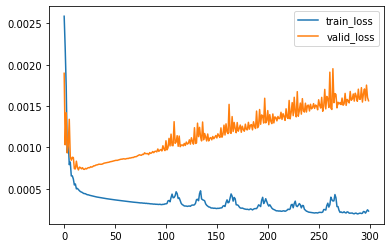

In [54]:
from torch.optim import Adam
c660_df = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
c660 = PartBulider(c660_df,x_col,y_col,limit_y_range=True)
c660.net = pretrain_net
c660.optimizer = Adam(c660.net.parameters(),lr=0.001)
c660.train()

In [55]:
c660.test(e=2e-2)

,R2,MSE,MAPE
Density_Feed Properties,0.619111,1.57297e-08,0.0123602
Density_Vent Gas Production Rate and Composition,0,1.78138e-09,0.00488767
Density_Distillate (Benzene Drag) Production Rate and Composition,0,2.79515e-12,0.000115097
Density_Sidedraw (Benzene )Production Rate and Composition,0,5.58379e-10,0.00121151
Density_Bottoms Production Rate and Composition,0,9.28242e-10,0.00241547
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0.9566,6.65736,1.14651
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0.905823,0.0753815,0.200897
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0.970569,0.0456539,0.15408
AVG,0.431513,0.847299,0.19031


In [56]:
c660.shrink()

In [57]:
joblib.dump(c660,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_op_real_data.pkl']